## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Rajasree Unnithan R\Downloads\simulated_transaction_2024 (1).csv")
data

Date Timestamp   Account No       Balance   Amount  \
0       01/01/2023     00:00  678330503.0   2971.000000  1584.00   
1       01/01/2023     00:00  472213568.0   3792.000000  1950.00   
2       01/01/2023     00:00  472213568.0   3012.000000  -780.00   
3       01/01/2023     00:00  283027736.0   1787.000000   780.00   
4       01/01/2023     00:00  624500124.0   3226.000000  1825.00   
...            ...       ...          ...           ...      ...   
230591  06/12/2023     20:54  581655972.0  45935.206861   -41.06   
230592  06/12/2023     20:55  786141370.0   -244.837500   -62.35   
230593  06/12/2023     21:05  824916823.0   9709.172159   -32.94   
230594  06/12/2023     21:13  366550080.0  26834.165794   -19.25   
230595  06/12/2023     21:32  259015404.0   1145.349837   -37.64   

        Third Party Account No    Third Party Name  
0                          NaN  Westport Care Home  
1                          NaN    Barbiee Boutique  
2                  283027736.0                 NaN  
3                  472213568.0                 NaN  
4                          NaN            Fat Face  
...                        ...                 ...  
230591                     NaN               Tesco  
230592                     NaN     Sainsbury Local  
230593                     NaN           Deliveroo  
230594                     NaN              Amazon  
230595                     NaN             JustEat  

[230596 rows x 7 columns]

In [3]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

# Handling missing data in Date and Timestamp 

In [4]:
data[data['Date'].isna() & data['Timestamp'].isna()]

Empty DataFrame
Columns: [Date, Timestamp, Account No, Balance, Amount, Third Party Account No, Third Party Name]
Index: []

##### No row have missing data in 'Date' and 'Timestamp' at same time

In [5]:
data[data['Date'].isna() | data['Timestamp'].isna()]

Date Timestamp   Account No       Balance  Amount  \
2734    01/01/2023       NaN  593191200.0   1490.020000  -14.99   
3918           NaN     00:00  554792076.0    575.020000   -5.99   
4106           NaN     00:00  581655972.0   6895.010000  -15.99   
4511           NaN     00:00  711140907.0   1217.000000   -7.00   
4710           NaN     09:23  310620484.0    992.080000  -11.98   
...            ...       ...          ...           ...     ...   
228485  03/12/2023       NaN  165691047.0    793.947100  -67.97   
228813  04/12/2023       NaN  287230540.0    997.120998 -660.00   
229139  04/12/2023       NaN  727417797.0   5970.393627  -39.77   
230045         NaN     19:52  196289502.0  18280.425041  -49.93   
230251  06/12/2023       NaN  815385232.0  12245.673605   -2.11   

        Third Party Account No Third Party Name  
2734                       NaN         Blizzard  
3918                       NaN   Mojang Studios  
4106                       NaN          Netflix  
4511                       NaN             Xbox  
4710                       NaN        The Works  
...                        ...              ...  
228485                     NaN          Matalan  
228813             447298754.0              NaN  
229139                     NaN         Fat Face  
230045                     NaN             Etsy  
230251                     NaN           AMAZON  

[480 rows x 7 columns]

In [6]:
df = data.copy()

In [7]:
df['Timestamp_delta'] = pd.to_timedelta(df['Timestamp'] + ':00')

# Perform forward and backward filling for Dates
df['Date_forward'] = df['Date'].ffill()
df['Date_backward'] = df['Date'].bfill()
# Perform forward filling for Timestamps
df['Timestamp_forward'] = df['Timestamp_delta'].ffill()

# Creating a temporary column for comparison.
df['Prev_Timestamp'] = df['Timestamp_delta'].shift(1)
df['Next_Timestamp'] = df['Timestamp_delta'].shift(-1)
df['Prev_Date'] = df['Date'].shift(1)
df['Next_Date'] = df['Date'].shift(-1)


# Handling missing values in Date
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Date']):
        # If forward and backward Dates are the same
        if df.loc[i, 'Date_forward'] == df.loc[i, 'Date_backward']:
            df.loc[i, 'Date'] = df.loc[i, 'Date_forward']
        else:
            # If Dates are different, compare Timestamps to determine the correct Date
            if df.loc[i, 'Timestamp_delta'] >= df.loc[i, 'Prev_Timestamp']: # 23:08 & 23:14, still same day
                df.loc[i, 'Date'] = df.loc[i, 'Prev_Date']
            else:
                df.loc[i, 'Date'] = df.loc[i, 'Next_Date']  # 23:08 & 00:14, start a new day

# Handling missing values in Timestamps
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Timestamp']):
        # If it has same Date with the previous entry, use the previous entry's Timestamp for filling
        if df.loc[i, 'Date'] == df.loc[i, 'Prev_Date']:
            df.loc[i, 'Timestamp'] = df.loc[i-1, 'Timestamp']
        else:
            df.loc[i, 'Timestamp'] = df.loc[i+1, 'Timestamp']


df.drop(['Timestamp_delta', 'Date_forward', 'Date_backward', 'Timestamp_forward', 'Prev_Timestamp', 'Next_Timestamp', 'Prev_Date', 'Next_Date'], axis=1, inplace=True)
df.head()

Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                 NaN  
3                 NaN  
4            Fat Face

In [8]:
df.isnull().sum()

Date                           0
Timestamp                      0
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [9]:
# Combine Data and Timestamp
from datetime import datetime

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Timestamp'], format='%d/%m/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M')
df = df.drop(['Date', 'Timestamp'], axis=1)

df

Account No       Balance   Amount  Third Party Account No  \
0       678330503.0   2971.000000  1584.00                     NaN   
1       472213568.0   3792.000000  1950.00                     NaN   
2       472213568.0   3012.000000  -780.00             283027736.0   
3       283027736.0   1787.000000   780.00             472213568.0   
4       624500124.0   3226.000000  1825.00                     NaN   
...             ...           ...      ...                     ...   
230591  581655972.0  45935.206861   -41.06                     NaN   
230592  786141370.0   -244.837500   -62.35                     NaN   
230593  824916823.0   9709.172159   -32.94                     NaN   
230594  366550080.0  26834.165794   -19.25                     NaN   
230595  259015404.0   1145.349837   -37.64                     NaN   

          Third Party Name          DateTime  
0       Westport Care Home  2023-01-01 00:00  
1         Barbiee Boutique  2023-01-01 00:00  
2                      NaN  2023-01-01 00:00  
3                      NaN  2023-01-01 00:00  
4                 Fat Face  2023-01-01 00:00  
...                    ...               ...  
230591               Tesco  2023-12-06 20:54  
230592     Sainsbury Local  2023-12-06 20:55  
230593           Deliveroo  2023-12-06 21:05  
230594              Amazon  2023-12-06 21:13  
230595             JustEat  2023-12-06 21:32  

[230596 rows x 6 columns]

# Handling missing data in Balance and Amount

## check

In [10]:
df[df['Balance'].isna() | df['Amount'].isna()]

Account No      Balance  Amount  Third Party Account No  \
949     857754342.0  2745.750000     NaN                     NaN   
1392    246753533.0          NaN -100.00                     NaN   
1821    424397946.0  3358.010000     NaN                     NaN   
3937    987656636.0   844.020000     NaN                     NaN   
4071    399538448.0  3506.070000     NaN                     NaN   
...             ...          ...     ...                     ...   
226295  661295096.0  3882.600950     NaN                     NaN   
227463  460463595.0     6.012055     NaN                     NaN   
227645  587225252.0  7342.350655     NaN                     NaN   
229764  117273481.0          NaN   -6.15                     NaN   
229970  497772347.0    47.741750     NaN                     NaN   

       Third Party Name          DateTime  
949                 LBG  2023-01-01 00:00  
1392    Grand Union BJJ  2023-01-01 00:00  
1821            PureGym  2023-01-01 00:00  
3937             Disney  2023-01-01 00:00  
4071             Amazon  2023-01-01 00:00  
...                 ...               ...  
226295           Disney  2023-11-30 23:59  
227463            Tesco  2023-12-01 20:04  
227645  Sainsbury Local  2023-12-02 07:37  
229764        Starbucks  2023-12-05 09:17  
229970          Matalan  2023-12-05 17:43  

[455 rows x 6 columns]

In [11]:
df[df['Balance'].isna() & df['Amount'].isna()]

Empty DataFrame
Columns: [Account No, Balance, Amount, Third Party Account No, Third Party Name, DateTime]
Index: []

##### No row have missing data in 'Balance' and 'Amount' at same time
##### Because we need to calculate missing data according to Account No

In [12]:
df[df['Balance'].isna() & df['Account No'].isna()]

Account No  Balance  Amount  Third Party Account No Third Party Name  \
163710         NaN      NaN  -19.19                     NaN        Deliveroo   

                DateTime  
163710  2023-09-05 18:22

In [13]:
df[df['Amount'].isna() & df['Account No'].isna()]

Empty DataFrame
Columns: [Account No, Balance, Amount, Third Party Account No, Third Party Name, DateTime]
Index: []

## Calculate missing 'Balance'
####  In case of missing record, use two methods: balance and amout in previous and behind to calculate balance. If the difference is less than 1, then use it. If more than 1, use the closer one.
##### If Keep 2 decimal places and leave 76 NAs, 1 decimal place and leave 50 NAs, and the difference is less than 1 and leave 47 NAs.

In [14]:
df['Balance'].isnull().sum()

246

In [15]:
df.sort_values(by=['Account No', 'DateTime'], inplace=True)
df = df.reset_index(drop=False)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M')

# Save index of missing Balance with uncontinuous record
#uncontinuous_index = []

for i in range(1, len(df)):
    if pd.isnull(df.iloc[i]['Balance']):
        calc_balance_1 = None
        calc_balance_2 = None
        #  In case of missing record, use two methods to calculate balance
        if df.iloc[i]['Account No'] == df.iloc[i-1]['Account No']: # Check if the current row and the previous row belong to the same account
            calc_balance_1 = df.iloc[i-1]['Balance'] + df.iloc[i]['Amount']
        if df.iloc[i]['Account No'] == df.iloc[i+1]['Account No']: # Check if the current row and the next row belong to the same account
            calc_balance_2 = df.iloc[i+1]['Balance'] - df.iloc[i+1]['Amount']

        if calc_balance_1 is not None and calc_balance_2 is not None:
            # When both methods give the same result, then fill the 'Balance'
            if abs(calc_balance_1 - calc_balance_2) <= 1:
                df.at[i, 'Balance'] = calc_balance_1    
            # When give unequal results, record is not continuous, choose the closer one in DateTime
            if abs(calc_balance_1 - calc_balance_2) > 1:
                #uncontinuous_index.extend([i-1, i, i+1]) 
                time_diff_prev = abs(df.iloc[i]['DateTime'] - df.iloc[i - 1]['DateTime'])
                time_diff_next = abs(df.iloc[i]['DateTime'] - df.iloc[i + 1]['DateTime'])
                if time_diff_prev < time_diff_next: 
                    df.at[i, 'Balance'] = calc_balance_1
                else:
                    df.at[i, 'Balance'] = calc_balance_2

# Check missing Balance with uncontinuous record
#uncontinuous_index.sort()
#uncontinuous = df.iloc[uncontinuous_index]
#uncontinuous.to_csv('uncontinuous.csv')
                
df['Balance'].isnull().sum()

1

In [16]:
df[df['Balance'].isna()]

index  Account No  Balance  Amount  Third Party Account No  \
230519  163710         NaN      NaN  -19.19                     NaN   

       Third Party Name            DateTime  
230519        Deliveroo 2023-09-05 18:22:00

One row cannot calculate because of missing 'Account No'

## Calculate missing 'Amount'

### fixed values

In [17]:
df['Amount'].isnull().sum()

209

##### Add assuming Amount from the difference between two Balances

In [18]:
for i in df[df['Amount'].isnull()].index:
    account_no = df.at[i, 'Account No']
    if df.at[i - 1, 'Account No'] == account_no:  # Ensure the previous record is from the same account
        calc_amount = df.at[i, 'Balance'] - df.at[i - 1, 'Balance']  
        df.at[i, 'Calculated_Amount'] = calc_amount
    else:
        continue

##### There are fixed deductions and disbursements such as salaries, loans, and monthly fees that occur on the first day of each month at 00:00, and on the last day of each month at both 00:00 and 23:59, totaling 47 instances.

In [19]:
missing_amount = df[df['Amount'].isna()]
start_end = missing_amount[missing_amount['DateTime'].dt.strftime('%H:%M').isin(['00:00', '23:59'])]
start_end = start_end.sort_values('DateTime', ascending=True)
#start_end = start_end[~start_end['Third Party Name'].isnull()]

print(start_end.shape[0])
start_end

54


index   Account No       Balance  Amount  Third Party Account No  \
226851    3937  987656636.0    844.020000     NaN                     NaN   
195445     949  857754342.0   2745.750000     NaN                     NaN   
79963     1821  424397946.0   3358.010000     NaN                     NaN   
72806     4071  399538448.0   3506.070000     NaN                     NaN   
80375    20245  425730826.0   1349.167609     NaN             191631876.0   
31757    23836  224112146.0    393.642650     NaN                     NaN   
98541    22434  496395938.0   5197.963098     NaN                     NaN   
139396   22401  644751433.0   1114.552142     NaN                     NaN   
192713   22111  851181128.0   4679.511779     NaN                     NaN   
116354   42431  552980092.0     86.845719     NaN                     NaN   
46882    43431  285220959.0   2837.189969     NaN                     NaN   
140223   56888  648644594.0   2044.399450     NaN                     NaN   
225766   56376  986267641.0   4423.917250     NaN                     NaN   
32626    62300  227104649.0   2117.198134     NaN                     NaN   
20032    62064  179173981.0   3418.529542     NaN                     NaN   
70983    59628  391688371.0   2529.695089     NaN                     NaN   
136126   80307  630691258.0    659.440701     NaN                     NaN   
142622   79264  656781737.0  -3871.100000     NaN                     NaN   
73230    77279  401293808.0    402.612150     NaN                     NaN   
85646    79362  449387287.0    560.207694     NaN                     NaN   
14837    77013  155317149.0    478.956700     NaN                     NaN   
79628    75897  422955974.0   1308.688335     NaN                     NaN   
58109    93265  331684336.0    543.955030     NaN             250957494.0   
189146   93257  834581602.0   1519.622150     NaN             444371478.0   
4157     94385  119993184.0    472.007697     NaN             384497904.0   
30462    96890  217540156.0  -2232.672320     NaN                     NaN   
135000   96489  627723633.0   -725.245378     NaN                     NaN   
27689    98769  212560376.0   -158.813874     NaN                     NaN   
157485   95271  700138124.0   2558.167300     NaN                     NaN   
224662  117101  982286721.0  -2579.855524     NaN                     NaN   
11530   116747  145387690.0   5761.561977     NaN                     NaN   
57271   137240  329840194.0   1851.853730     NaN                     NaN   
7254    137354  130522384.0   -339.413816     NaN                     NaN   
171179  135681  762859681.0   -256.849900     NaN                     NaN   
205610  154900  895331556.0   1051.420600     NaN                     NaN   
58834   155900  336557504.0   2583.640089     NaN             578131296.0   
30901   157001  220183538.0    926.425400     NaN                     NaN   
96880   156979  492215823.0   1881.102574     NaN                     NaN   
138371  156819  639549973.0   7060.583110     NaN                     NaN   
42532   158016  266777719.0    359.686434     NaN                     NaN   
9623    156592  138351025.0   -301.323450     NaN                     NaN   
58598   181457  336171116.0   -425.534550     NaN                     NaN   
57305   180285  329840194.0   2039.106730     NaN                     NaN   
220733  178071  962295212.0  -3803.757650     NaN                     NaN   
59072   202796  337771621.0  -2829.262650     NaN                     NaN   
129831  200880  607629901.0  -4326.078320     NaN                     NaN   
182247  200280  812012103.0   -781.904300     NaN             291580432.0   
19614   220964  175452235.0   -500.548250     NaN             835736339.0   
185988  220958  822718326.0  14588.708001     NaN                     NaN   
203311  224074  887156614.0   -335.438621     NaN                     NaN   
98505   223924  494977194.0   2126.834471     NaN                     NaN   
14482

### Fix values in Third Party Account No

In [20]:
df[df['Third Party Account No'].notnull() & df['Amount'].isnull()]

index   Account No      Balance  Amount  Third Party Account No  \
4157     94385  119993184.0   472.007697     NaN             384497904.0   
19614   220964  175452235.0  -500.548250     NaN             835736339.0   
58109    93265  331684336.0   543.955030     NaN             250957494.0   
58834   155900  336557504.0  2583.640089     NaN             578131296.0   
80375    20245  425730826.0  1349.167609     NaN             191631876.0   
182247  200280  812012103.0  -781.904300     NaN             291580432.0   
189146   93257  834581602.0  1519.622150     NaN             444371478.0   
207358   30751  899983008.0  -160.647450     NaN             791220575.0   

       Third Party Name            DateTime  Calculated_Amount  
4157                NaN 2023-05-31 23:59:00            1282.00  
19614               NaN 2023-11-29 23:59:00            1310.00  
58109               NaN 2023-05-30 23:59:00            1170.00  
58834               NaN 2023-08-31 23:59:00            2131.66  
80375               NaN 2023-01-30 23:59:00            1910.00  
182247              NaN 2023-10-31 23:59:00             620.00  
189146              NaN 2023-05-30 23:59:00            1532.00  
207358              NaN 2023-02-08 22:21:00            -200.00

#### Because most of missing in these rows are fix, use mode to fill

In [21]:
from scipy import stats

modes = df[df['Third Party Account No'].notnull() & df['Amount'].notnull()].groupby('Third Party Account No')['Amount'].agg(pd.Series.mode)
mode_dict = modes.to_dict()
df.loc[df['Amount'].isnull() & df['Third Party Account No'].notnull(), 'Amount'] = df['Third Party Account No'].map(mode_dict)

In [22]:
indices = [4157, 19614, 58109, 58834, 80375, 182247, 189146, 207358]
extracted_rows = df.loc[indices]
extracted_rows

index   Account No      Balance  \
4157     94385  119993184.0   472.007697   
19614   220964  175452235.0  -500.548250   
58109    93265  331684336.0   543.955030   
58834   155900  336557504.0  2583.640089   
80375    20245  425730826.0  1349.167609   
182247  200280  812012103.0  -781.904300   
189146   93257  834581602.0  1519.622150   
207358   30751  899983008.0  -160.647450   

                                                   Amount  \
4157                                               -430.0   
19614                                              1310.0   
58109                                              -780.0   
58834                                              -710.0   
80375                                              1910.0   
182247                                              620.0   
189146                                             -510.0   
207358  [-300.0, -250.0, -210.0, -200.0, -150.0, -140....   

        Third Party Account No Third Party Name            DateTime  \
4157               384497904.0              NaN 2023-05-31 23:59:00   
19614              835736339.0              NaN 2023-11-29 23:59:00   
58109              250957494.0              NaN 2023-05-30 23:59:00   
58834              578131296.0              NaN 2023-08-31 23:59:00   
80375              191631876.0              NaN 2023-01-30 23:59:00   
182247             291580432.0              NaN 2023-10-31 23:59:00   
189146             444371478.0              NaN 2023-05-30 23:59:00   
207358             791220575.0              NaN 2023-02-08 22:21:00   

        Calculated_Amount  
4157              1282.00  
19614             1310.00  
58109             1170.00  
58834             2131.66  
80375             1910.00  
182247             620.00  
189146            1532.00  
207358            -200.00

In [23]:
# Mannual change Amount
df.at[207358, 'Amount'] = df.at[207358, 'Calculated_Amount']

#### this one is not fix, just use the Calculated result

### Fix values in Third Party Name

#### Find the Amount from the last instance and the next instance for the same time across different months. total of 38 instances are filled.
#### like 1/1 00:00 use 2/1 00:00 in same Account and Third Party, and 1/31 00:00 use 2/28 00:00, 2/28 23:59 use 3/31 23:59

In [24]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

filled_indices = []
filled_indices2 = []

# calculate special data and timestamp
def get_special_dates(year, month):
    first_day_of_month = pd.Timestamp(year=year, month=month, day=1)
    last_day_of_month = first_day_of_month + pd.offsets.MonthEnd(0)
    last_day_of_month_0000 = last_day_of_month.replace(hour=00, minute=00, second=00)
    last_day_of_month_2359 = last_day_of_month.replace(hour=23, minute=59, second=00)
    return first_day_of_month, last_day_of_month_0000, last_day_of_month_2359

# Find Na of Amount
for i, row in df[df['Amount'].isnull()].iterrows():
    account_no = row['Account No']
    third_party_name = row['Third Party Name']
    current_datetime = row['DateTime']
    year, month = current_datetime.year, current_datetime.month
    
    first_day_of_month, last_day_of_month_0000, last_day_of_month_2359 = get_special_dates(year, month)
    
    # Compare data and timestamp 
    target_dates = []
    if current_datetime in [first_day_of_month, last_day_of_month_0000, last_day_of_month_2359]:
        if current_datetime == first_day_of_month:
            target_dates = [first_day_of_month - pd.offsets.MonthBegin(1), first_day_of_month + pd.offsets.MonthBegin(1)]
        elif current_datetime == last_day_of_month_0000:
            target_dates = [last_day_of_month_0000 - pd.offsets.MonthEnd(1), last_day_of_month_0000 + pd.offsets.MonthEnd(1)]
        elif current_datetime == last_day_of_month_2359:
            target_dates = [last_day_of_month_2359 - pd.offsets.MonthEnd(1), last_day_of_month_2359 + pd.offsets.MonthEnd(1)]
    
    # fill NA of Amount
    for td in target_dates:
        matching_record = df[(df['Account No'] == account_no) & 
                             (df['Third Party Name'] == third_party_name) & 
                             (df['DateTime'] == td)]
        if not matching_record.empty:
            fill_amount = matching_record.iloc[0]['Amount']
            df.at[i, 'Amount'] = fill_amount
            filled_indices.append(i)
            filled_indices2.append(df.at[i, 'index'])
            break  

print(f"Filled indices: {filled_indices}")
length_filled_indices = len(filled_indices)
length_filled_indices

Filled indices: [7254, 9623, 14837, 20032, 27689, 30462, 30901, 31757, 32626, 42532, 46882, 57271, 58598, 70983, 79628, 85646, 89220, 96880, 98505, 98541, 116354, 129831, 135000, 136126, 139396, 140223, 142622, 144572, 144821, 157485, 171179, 185988, 192713, 195445, 205610, 220733, 224662, 225766]


38

##### Check the result of filling missing value

In [25]:
extracted_rows = []

for index in filled_indices:
    #if index in df.index and (index - 1) in df.index:
    extracted_row = df.loc[[index - 1, index]]
    extracted_rows.append(extracted_row)

extracted_rows_df = pd.concat(extracted_rows)
extracted_rows_df.to_csv('extracted_rows.csv', index=False)

In [26]:
df['Amount'].isnull().sum()

163

### According to two Balance to calculate Amount

In [27]:
df['Amount'].isnull().sum()

163

#### Check the calculate amount inside the mean+-3*std or not, if not use mean, if std is NA or 0 still use mean
#### For personal transfers, use the overall data for filling in missing values. 
#### For merchant transactions, use the average value for each account to fill in the gaps

In [28]:
# Calculate stats for merchant transactions and personal transfers
merchant_stats = df[(df['Third Party Name'].notnull()) & (df['Amount'].notnull())].groupby(['Account No', 'Third Party Name'])['Amount'].agg(['mean', 'std'])
personal_stats = df[(df['Third Party Account No'].notnull()) & (df['Amount'].notnull())].groupby(['Third Party Account No'])['Amount'].agg(['mean', 'std'])

count0, count1, count2 = [0, 0, 0]
count3, count4, count5 = [0, 0, 0]
index_mer1 = []
index_mer2 = []
index_mer3 = []
index_mer4 = []
df['Calculated_Amount'] = None

for i in df[df['Amount'].isnull()].index:
    account_no = df.at[i, 'Account No']
    third_party_name = df.at[i, 'Third Party Name']
    third_party_account_no = df.at[i, 'Third Party Account No']

    # Calculate the amount
    if df.at[i - 1, 'Account No'] == account_no:  # Ensure the previous record is from the same account
        calc_amount = df.at[i, 'Balance'] - df.at[i - 1, 'Balance']  
        df.at[i, 'Calculated_Amount'] = calc_amount  # Store the calculated amount
    else:
        continue

    # If it's a merchant transaction
    if pd.notnull(third_party_name) and pd.isnull(third_party_account_no):
        if (account_no, third_party_name) in merchant_stats.index:
            mean = merchant_stats.loc[(account_no, third_party_name), 'mean']
            std = merchant_stats.loc[(account_no, third_party_name), 'std']
            if pd.notnull(std) and std != 0:
                if (mean - 3*std) <= calc_amount <= (mean + 3*std):
                    df.at[i, 'Amount'] = calc_amount
                    count0 += 1
                else:
                    df.at[i, 'Amount'] = mean
                    index_mer1.append(i)
                    count1 += 1
            else:
                df.at[i, 'Amount'] = mean
                index_mer2.append(i)
                count2 += 1
        
    # If it's a personal transfer
    elif pd.isnull(third_party_name) and pd.notnull(third_party_account_no):
        if third_party_account_no in personal_stats.index:
            mean = personal_stats.loc[(third_party_account_no), 'mean']
            std = personal_stats.loc[(third_party_account_no), 'std']
            if pd.notnull(std) and std != 0:
                if (mean - 3*std) <= calc_amount <= (mean + 3*std):
                    df.at[i, 'Amount'] = calc_amount
                    count3 += 1
                else:
                    df.at[i, 'Amount'] = mean
                    count4 += 1
                    index_mer3.append(i)
            else:
                df.at[i, 'Amount'] = mean
                count5 += 1
                index_mer4.append(i)

# Check the remaining number of records with null Amounts
df['Amount'].isnull().sum(), count0, count1, count2, count3, count4, count5

(2, 145, 5, 11, 0, 0, 0)

#### Check the fill resulte, and manual fix part of them

In [29]:
fill = df.iloc[index_mer1]
fill

index   Account No      Balance     Amount  Third Party Account No  \
32249   111098  225210798.0   893.968643 -26.896731                     NaN   
61533    89764  348325817.0  6841.348691 -17.738333                     NaN   
106086  118627  519933553.0   544.003004 -66.868214                     NaN   
123025   26511  583558311.0   557.978785 -73.841905                     NaN   
150608   35415  679911053.0  1490.139357    -25.348                     NaN   

       Third Party Name            DateTime Calculated_Amount  
32249          Cass Art 2023-06-26 10:01:00            -94.97  
61533     Fitted Stitch 2023-05-22 08:33:00        -33.755772  
106086            Tesco 2023-07-01 08:34:00          -216.916  
123025    Sports Direct 2023-02-01 09:20:00           -177.98  
150608        Deliveroo 2023-02-20 00:33:00            -41.24

In [30]:
# Except Tesco
indices_to_update = [32249, 61533, 123025, 150608]
for idx in indices_to_update:
    df.at[idx, 'Amount'] = df.at[idx, 'Calculated_Amount']

fill = df.iloc[index_mer1]
fill

index   Account No      Balance     Amount  Third Party Account No  \
32249   111098  225210798.0   893.968643     -94.97                     NaN   
61533    89764  348325817.0  6841.348691 -33.755772                     NaN   
106086  118627  519933553.0   544.003004 -66.868214                     NaN   
123025   26511  583558311.0   557.978785    -177.98                     NaN   
150608   35415  679911053.0  1490.139357     -41.24                     NaN   

       Third Party Name            DateTime Calculated_Amount  
32249          Cass Art 2023-06-26 10:01:00            -94.97  
61533     Fitted Stitch 2023-05-22 08:33:00        -33.755772  
106086            Tesco 2023-07-01 08:34:00          -216.916  
123025    Sports Direct 2023-02-01 09:20:00           -177.98  
150608        Deliveroo 2023-02-20 00:33:00            -41.24

In [31]:
fill = df.iloc[index_mer2]
fill

index   Account No      Balance Amount  Third Party Account No  \
11530   116747  145387690.0  5761.561977 -12.99                     NaN   
57305   180285  329840194.0  2039.106730 -12.99                     NaN   
59072   202796  337771621.0 -2829.262650 -14.99                     NaN   
73230    77279  401293808.0   402.612150 -14.99                     NaN   
79963     1821  424397946.0  3358.010000 -18.99                     NaN   
117315   73954  555804115.0 -1222.221848 -10.04                     NaN   
133373  213902  623156843.0  4600.020616 -17.49                     NaN   
138371  156819  639549973.0  7060.583110 -14.99                     NaN   
152655   17105  684988568.0  1155.664625 -99.98                     NaN   
203311  224074  887156614.0  -335.438621 -12.99                     NaN   
226851    3937  987656636.0   844.020000  -7.99                     NaN   

       Third Party Name            DateTime Calculated_Amount  
11530        SquareOnix 2023-06-30 23:59:00            -12.99  
57305        SquareOnix 2023-09-30 23:59:00            -12.99  
59072          Blizzard 2023-10-31 23:59:00            -14.99  
73230          Blizzard 2023-04-30 23:59:00            -14.99  
79963           PureGym 2023-01-01 00:00:00            -18.99  
117315          JustEat 2023-04-29 02:47:00            -13.34  
133373             Etsy 2023-11-17 04:42:00        -54.103313  
138371         Blizzard 2023-08-31 23:59:00            -14.99  
152655              CeX 2023-01-23 16:41:00           -129.97  
203311       SquareOnix 2023-11-30 23:59:00            -12.99  
226851           Disney 2023-01-01 00:00:00             -7.99

In [32]:
# Change value of JustEat，Etsy，CeX
indices_to_update = [117315, 133373, 152655]
for idx in indices_to_update:
    df.at[idx, 'Amount'] = df.at[idx, 'Calculated_Amount']

fill = df.iloc[index_mer2]
fill

index   Account No      Balance     Amount  Third Party Account No  \
11530   116747  145387690.0  5761.561977     -12.99                     NaN   
57305   180285  329840194.0  2039.106730     -12.99                     NaN   
59072   202796  337771621.0 -2829.262650     -14.99                     NaN   
73230    77279  401293808.0   402.612150     -14.99                     NaN   
79963     1821  424397946.0  3358.010000     -18.99                     NaN   
117315   73954  555804115.0 -1222.221848     -13.34                     NaN   
133373  213902  623156843.0  4600.020616 -54.103313                     NaN   
138371  156819  639549973.0  7060.583110     -14.99                     NaN   
152655   17105  684988568.0  1155.664625    -129.97                     NaN   
203311  224074  887156614.0  -335.438621     -12.99                     NaN   
226851    3937  987656636.0   844.020000      -7.99                     NaN   

       Third Party Name            DateTime Calculated_Amount  
11530        SquareOnix 2023-06-30 23:59:00            -12.99  
57305        SquareOnix 2023-09-30 23:59:00            -12.99  
59072          Blizzard 2023-10-31 23:59:00            -14.99  
73230          Blizzard 2023-04-30 23:59:00            -14.99  
79963           PureGym 2023-01-01 00:00:00            -18.99  
117315          JustEat 2023-04-29 02:47:00            -13.34  
133373             Etsy 2023-11-17 04:42:00        -54.103313  
138371         Blizzard 2023-08-31 23:59:00            -14.99  
152655              CeX 2023-01-23 16:41:00           -129.97  
203311       SquareOnix 2023-11-30 23:59:00            -12.99  
226851           Disney 2023-01-01 00:00:00             -7.99

In [33]:
df[df['Amount'].isna()]

index   Account No     Balance Amount  Third Party Account No  \
123247  65949  583579399.0  514.902300    NaN                     NaN   
196979  34681  859264768.0  403.097292    NaN                     NaN   

       Third Party Name            DateTime Calculated_Amount  
123247              NaN 2023-04-08 12:09:00          -50.0346  
196979              CeX 2023-02-18 09:41:00            -79.98

In [34]:
df.at[196979, 'Amount'] = df.at[196979, 'Calculated_Amount']

In [35]:
df.isnull().sum()

index                          0
Account No                   224
Balance                        1
Amount                         1
Third Party Account No    223764
Third Party Name            7079
DateTime                       0
Calculated_Amount         230433
dtype: int64

# Delete missing data

In [36]:
df.isnull().sum()

index                          0
Account No                   224
Balance                        1
Amount                         1
Third Party Account No    223764
Third Party Name            7079
DateTime                       0
Calculated_Amount         230433
dtype: int64

In [37]:
df

index   Account No       Balance  Amount  Third Party Account No  \
0          912  101531259.0    124.000000  -859.0                     NaN   
1         4036  101531259.0    116.010000   -7.99                     NaN   
2         4037  101531259.0     16.010000  -100.0                     NaN   
3         4743  101531259.0    -63.990000   -80.0                     NaN   
4         5133  101531259.0   -247.990000  -184.0                     NaN   
...        ...          ...           ...     ...                     ...   
230591  223657          NaN  11517.049529  -15.99                     NaN   
230592  226353          NaN  -1692.102105  -15.99                     NaN   
230593  222727          NaN   -731.036300 -1226.0                     NaN   
230594  229119          NaN   2619.340104 -225.37                     NaN   
230595  230360          NaN     30.958899 -111.36                     NaN   

       Third Party Name            DateTime Calculated_Amount  
0                   LBG 2023-01-01 00:00:00              None  
1                Disney 2023-01-01 00:00:00              None  
2       Grand Union BJJ 2023-01-01 00:00:00              None  
3               Matalan 2023-01-01 09:37:00              None  
4               Matalan 2023-01-01 12:00:00              None  
...                 ...                 ...               ...  
230591          Netflix 2023-11-30 23:59:00              None  
230592          Netflix 2023-11-30 23:59:00              None  
230593          Halifax 2023-12-01 00:00:00              None  
230594          Topshop 2023-12-04 10:03:00              None  
230595    Fitted Stitch 2023-12-06 11:34:00              None  

[230596 rows x 8 columns]

In [38]:
df = df.dropna(subset=['Account No'])
df = df.dropna(subset=['Third Party Account No', 'Third Party Name'], how='all')
df = df.drop('Calculated_Amount', axis=1)

In [39]:
df.set_index('index', inplace=True)
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)

In [40]:
df

Account No       Balance  Amount  Third Party Account No  \
0       678330503.0   2971.000000  1584.0                     NaN   
1       472213568.0   3792.000000  1950.0                     NaN   
2       472213568.0   3012.000000  -780.0             283027736.0   
3       283027736.0   1787.000000   780.0             472213568.0   
4       624500124.0   3226.000000  1825.0                     NaN   
...             ...           ...     ...                     ...   
230121  581655972.0  45935.206861  -41.06                     NaN   
230122  786141370.0   -244.837500  -62.35                     NaN   
230123  824916823.0   9709.172159  -32.94                     NaN   
230124  366550080.0  26834.165794  -19.25                     NaN   
230125  259015404.0   1145.349837  -37.64                     NaN   

          Third Party Name            DateTime  
0       Westport Care Home 2023-01-01 00:00:00  
1         Barbiee Boutique 2023-01-01 00:00:00  
2                      NaN 2023-01-01 00:00:00  
3                      NaN 2023-01-01 00:00:00  
4                 Fat Face 2023-01-01 00:00:00  
...                    ...                 ...  
230121               Tesco 2023-12-06 20:54:00  
230122     Sainsbury Local 2023-12-06 20:55:00  
230123           Deliveroo 2023-12-06 21:05:00  
230124              Amazon 2023-12-06 21:13:00  
230125             JustEat 2023-12-06 21:32:00  

[230126 rows x 6 columns]

In [41]:
df.isnull().sum()

Account No                     0
Balance                        0
Amount                         0
Third Party Account No    223297
Third Party Name            6829
DateTime                       0
dtype: int64

## Category Mapping

In [42]:
df['DateTime'] = df['DateTime'].astype(str)

df[['Date', 'Timestamp']] = df['DateTime'].str.split(' ', expand=True)

df['DateTime'] = pd.to_datetime(df['DateTime'])

In [43]:
df

Account No       Balance  Amount  Third Party Account No  \
0       678330503.0   2971.000000  1584.0                     NaN   
1       472213568.0   3792.000000  1950.0                     NaN   
2       472213568.0   3012.000000  -780.0             283027736.0   
3       283027736.0   1787.000000   780.0             472213568.0   
4       624500124.0   3226.000000  1825.0                     NaN   
...             ...           ...     ...                     ...   
230121  581655972.0  45935.206861  -41.06                     NaN   
230122  786141370.0   -244.837500  -62.35                     NaN   
230123  824916823.0   9709.172159  -32.94                     NaN   
230124  366550080.0  26834.165794  -19.25                     NaN   
230125  259015404.0   1145.349837  -37.64                     NaN   

          Third Party Name            DateTime        Date Timestamp  
0       Westport Care Home 2023-01-01 00:00:00  2023-01-01  00:00:00  
1         Barbiee Boutique 2023-01-01 00:00:00  2023-01-01  00:00:00  
2                      NaN 2023-01-01 00:00:00  2023-01-01  00:00:00  
3                      NaN 2023-01-01 00:00:00  2023-01-01  00:00:00  
4                 Fat Face 2023-01-01 00:00:00  2023-01-01  00:00:00  
...                    ...                 ...         ...       ...  
230121               Tesco 2023-12-06 20:54:00  2023-12-06  20:54:00  
230122     Sainsbury Local 2023-12-06 20:55:00  2023-12-06  20:55:00  
230123           Deliveroo 2023-12-06 21:05:00  2023-12-06  21:05:00  
230124              Amazon 2023-12-06 21:13:00  2023-12-06  21:13:00  
230125             JustEat 2023-12-06 21:32:00  2023-12-06  21:32:00  

[230126 rows x 8 columns]

In [44]:
df.loc[(df['Timestamp'].isin(['00:00:00', '23:59:00'])) & (df['Amount'] == -7.99) & (df['Third Party Name'] == 'Amazon'), 'Third Party Name'] = 'Amazon Prime'
df['Third Party Name'] = df['Third Party Name'].replace('Amazon', 'AMAZON')

In [45]:
df['Third Party Name'].nunique()

83

In [46]:
num_negatives = (df['Amount'] < 0).sum()
num_positives = (df['Amount'] > 0).sum()

print("Number of negative values in column '{}': {}".format('Amount', num_negatives))
print("Number of positive values in column '{}': {}".format('Amount', num_positives))

Number of negative values in column 'Amount': 219710
Number of positive values in column 'Amount': 10407


In [47]:
df_copy = df.copy()

In [48]:
unique_business_df = df_copy.loc[pd.to_numeric(df_copy['Third Party Name'], errors='coerce').isna(), ['Third Party Name']].drop_duplicates()

In [49]:
unique_business_df.dropna(inplace=True)

In [50]:
unique_business_df

Third Party Name
0       Westport Care Home
1         Barbiee Boutique
4                 Fat Face
5         Lavender Primary
6              A Cut Above
...                    ...
91858            Kew House
98824                  HMV
106101             Millets
139829          Mothercare
186877  Mountain Warehouse

[83 rows x 1 columns]

In [51]:
def remove_non_alphabets(s):
    return ''.join(char if char.isalpha() else ' ' for char in s)

In [52]:
unique_business_df['cleaned_account_name'] = unique_business_df['Third Party Name'].apply(lambda x: remove_non_alphabets(str(x)))

In [53]:
unique_business_df['lower_name'] = unique_business_df['cleaned_account_name'].apply(lambda x: str(x).lower())

In [54]:
unique_business_df

Third Party Name cleaned_account_name          lower_name
0       Westport Care Home   Westport Care Home  westport care home
1         Barbiee Boutique     Barbiee Boutique    barbiee boutique
4                 Fat Face             Fat Face            fat face
5         Lavender Primary     Lavender Primary    lavender primary
6              A Cut Above          A Cut Above         a cut above
...                    ...                  ...                 ...
91858            Kew House            Kew House           kew house
98824                  HMV                  HMV                 hmv
106101             Millets              Millets             millets
139829          Mothercare           Mothercare          mothercare
186877  Mountain Warehouse   Mountain Warehouse  mountain warehouse

[83 rows x 3 columns]

In [55]:
similarity_mapping = {
    'Café': ['starbucks', 'coffee', 'costa coffee'],
    'Gaming Store': ['gamestation', 'cex'],
    'Game Subscriptions': ['blizzard', 'xbox', 'mojang studios', 'squareonix'],
    'Pub': ['kings arms', 'the crown', 'rose   crown'],
    'Entertainment': ['disney', 'netflix', 'amazon prime'],
    'Gym': ['puregym'],
    'Pharmacy': ['lloyds pharmacy', 'boots'],
    'Books and Stationary': ['blackwell s', 'foyles'],
    'Online Shopping': ['amazon', 'etsy'],
    'Arts and Crafts Store': ['the works', 'hobby lobby', 'hobbycraft', 'craftastic', 'five senses art', 'cass art', 'brilliant brushes'],
    'Outdoor Clothing Store': ['fat face', 'north face', 'millets', 'mountain warehouse'],
    'Clothing Store': ['topshop', 'matalan', 'revella'],
    'Food Delivery': ['deliveroo', 'justeat'],
    'Supermarket': ['coop local', 'sainsbury', 'tesco', 'sainsbury local'],
    'Knitting Store': ['wool', 'a yarn story', 'stitch by stitch'],
    'Tayloring Shop': ['loosely fitted', 'fitted stitch'],
    'Sports Field': ['rugbyfields'],
    'Department Store': ['selfridges'],
    'Sports Store': ['sports direct', 'reebok', 'jd sports', 'head'],
    'Hospital': ['remedy plus care', 'university college hospital'],
    'Martial Arts School': ['grand union bjj'],
    'Restaurant': ['frankie   bennies'],
    'School': ['town high', 'lavender primary', 'kew house'],
    'Kids Store': ['gap kids', 'barbiee boutique', 'mamas   papas', 'mothercare'],
    'Park': ['victoria park'],
    'Furniture Shop': ['happy days home'],
    'Pet Store': ['pets corner'],
    'Opticals Store': ['specsavers', 'vision express'],
    'Banking': ['halifax', 'lbg'],
    'Barber' : ['a cut above'],
    'Collectables store' : ['collector cave', 'hmv']
}

In [56]:
unique_business_df['group'] = unique_business_df['lower_name'].apply(lambda x: next((group for group, words in similarity_mapping.items() if any(f'{word}' in f'{x}' for word in words)), 'OTHER'))

In [57]:
unique_business_df = unique_business_df[['Third Party Name', 'group']].drop_duplicates()

In [58]:
mapped_df = pd.merge(df_copy, unique_business_df, on='Third Party Name', how='left')

In [59]:
mapped_df

Account No       Balance  Amount  Third Party Account No  \
0       678330503.0   2971.000000  1584.0                     NaN   
1       472213568.0   3792.000000  1950.0                     NaN   
2       472213568.0   3012.000000  -780.0             283027736.0   
3       283027736.0   1787.000000   780.0             472213568.0   
4       624500124.0   3226.000000  1825.0                     NaN   
...             ...           ...     ...                     ...   
230121  581655972.0  45935.206861  -41.06                     NaN   
230122  786141370.0   -244.837500  -62.35                     NaN   
230123  824916823.0   9709.172159  -32.94                     NaN   
230124  366550080.0  26834.165794  -19.25                     NaN   
230125  259015404.0   1145.349837  -37.64                     NaN   

          Third Party Name            DateTime        Date Timestamp  \
0       Westport Care Home 2023-01-01 00:00:00  2023-01-01  00:00:00   
1         Barbiee Boutique 2023-01-01 00:00:00  2023-01-01  00:00:00   
2                      NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
3                      NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
4                 Fat Face 2023-01-01 00:00:00  2023-01-01  00:00:00   
...                    ...                 ...         ...       ...   
230121               Tesco 2023-12-06 20:54:00  2023-12-06  20:54:00   
230122     Sainsbury Local 2023-12-06 20:55:00  2023-12-06  20:55:00   
230123           Deliveroo 2023-12-06 21:05:00  2023-12-06  21:05:00   
230124              AMAZON 2023-12-06 21:13:00  2023-12-06  21:13:00   
230125             JustEat 2023-12-06 21:32:00  2023-12-06  21:32:00   

                         group  
0                        OTHER  
1                   Kids Store  
2                          NaN  
3                          NaN  
4       Outdoor Clothing Store  
...                        ...  
230121             Supermarket  
230122             Supermarket  
230123           Food Delivery  
230124         Online Shopping  
230125           Food Delivery  

[230126 rows x 9 columns]

In [60]:
#mapped_df.to_csv(r"C:\Users\Rajasree Unnithan R\Downloads\mapped_category.csv")

In [61]:
Incoming = mapped_df[mapped_df['Amount'] > 0]

In [62]:
Incoming.head(20)

Account No  Balance   Amount  Third Party Account No    Third Party Name  \
0   678330503.0  2971.00   1584.0                     NaN  Westport Care Home   
1   472213568.0  3792.00   1950.0                     NaN    Barbiee Boutique   
3   283027736.0  1787.00    780.0             472213568.0                 NaN   
4   624500124.0  3226.00   1825.0                     NaN            Fat Face   
5   203466392.0  4607.66  2841.66                     NaN    Lavender Primary   
6   768271776.0  3620.00   1950.0                     NaN         A Cut Above   
8   215404070.0  1965.00    780.0             768271776.0                 NaN   
9   456221621.0  2831.00   1675.0                     NaN               Tesco   
10  350921975.0  2458.50   1842.5                     NaN   Brilliant Brushes   
12  455831435.0  3253.10   1620.1                     NaN        Costa Coffee   
14  442079728.0  2426.00    650.0             455831435.0                 NaN   
15  832564361.0  5376.00   3542.0                     NaN     Premier Finance   
16  407574996.0  3151.00   1609.0                     NaN            Fat Face   
17  172084472.0  2449.00   1943.0                     NaN  Westport Care Home   
19  407574996.0  4451.00   1300.0             172084472.0                 NaN   
20  442070890.0  4074.10   2648.1                     NaN    Lavender Primary   
22  605711527.0  1928.00    660.0             442070890.0                 NaN   
23  744968736.0  3154.00   1584.0                     NaN  Westport Care Home   
24  865748375.0  4607.00   2773.0                     NaN         A Cut Above   
26  548907062.0  2513.00    690.0             865748375.0                 NaN   

     DateTime        Date Timestamp                   group  
0  2023-01-01  2023-01-01  00:00:00                   OTHER  
1  2023-01-01  2023-01-01  00:00:00              Kids Store  
3  2023-01-01  2023-01-01  00:00:00                     NaN  
4  2023-01-01  2023-01-01  00:00:00  Outdoor Clothing Store  
5  2023-01-01  2023-01-01  00:00:00                  School  
6  2023-01-01  2023-01-01  00:00:00                  Barber  
8  2023-01-01  2023-01-01  00:00:00                     NaN  
9  2023-01-01  2023-01-01  00:00:00             Supermarket  
10 2023-01-01  2023-01-01  00:00:00   Arts and Crafts Store  
12 2023-01-01  2023-01-01  00:00:00                    Café  
14 2023-01-01  2023-01-01  00:00:00                     NaN  
15 2023-01-01  2023-01-01  00:00:00                   OTHER  
16 2023-01-01  2023-01-01  00:00:00  Outdoor Clothing Store  
17 2023-01-01  2023-01-01  00:00:00                   OTHER  
19 2023-01-01  2023-01-01  00:00:00                     NaN  
20 2023-01-01  2023-01-01  00:00:00                  School  
22 2023-01-01  2023-01-01  00:00:00                     NaN  
23 2023-01-01  2023-01-01  00:00:00                   OTHER  
24 2023-01-01  2023-01-01  00:00:00                  Barber  
26 2023-01-01  2023-01-01  00:00:00                     NaN

In [63]:
Incoming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10407 entries, 0 to 228394
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Account No              10407 non-null  float64       
 1   Balance                 10407 non-null  float64       
 2   Amount                  10407 non-null  object        
 3   Third Party Account No  3348 non-null   float64       
 4   Third Party Name        7059 non-null   object        
 5   DateTime                10407 non-null  datetime64[ns]
 6   Date                    10407 non-null  object        
 7   Timestamp               10407 non-null  object        
 8   group                   7059 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 813.0+ KB


In [64]:
Incoming_personal = Incoming[Incoming['Third Party Account No'].notnull()]

In [65]:
Incoming_personal.shape

(3348, 9)

In [66]:
Incoming_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 3 to 228394
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Account No              3348 non-null   float64       
 1   Balance                 3348 non-null   float64       
 2   Amount                  3348 non-null   object        
 3   Third Party Account No  3348 non-null   float64       
 4   Third Party Name        0 non-null      object        
 5   DateTime                3348 non-null   datetime64[ns]
 6   Date                    3348 non-null   object        
 7   Timestamp               3348 non-null   object        
 8   group                   0 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 261.6+ KB


In [67]:
# Group by Account No and Third Party Account No
Incoming_personal_grouped = Incoming_personal.groupby(['Account No', 'Third Party Account No'])

# Calculate the count of occurrences of each key-value pair
occurrences = Incoming_personal_grouped.size().reset_index(name='Number of Occurances')

# Calculate frequency of occurrence considering the date and timestamp
# You can choose any other date/time component based on your requirement
frequency = Incoming_personal_grouped['DateTime'].count().reset_index(name='Frequency of Transactions')

# Create a new column with the list of amounts for each key-value pair
amount_list = Incoming_personal_grouped['Amount'].apply(list).reset_index(name='Amounts Transacted')

# Create a new column with the list of amounts for each key-value pair
times_list = Incoming_personal_grouped['Timestamp'].apply(list).reset_index(name='Times of Transactions')

# Merge the calculated dataframes
result = pd.merge(frequency, amount_list, on=['Account No', 'Third Party Account No'])
result = pd.merge(result, times_list, on=['Account No', 'Third Party Account No'])

# Print the resulting DataFrame
print(result)

      Account No  Third Party Account No  Frequency of Transactions  \
0    104832000.0             587923845.0                          2   
1    105375973.0             709632525.0                         10   
2    108481285.0             913801979.0                         12   
3    108812033.0             386277162.0                         11   
4    108931112.0             646840694.0                          1   
..           ...                     ...                        ...   
392  987656636.0             450896297.0                         11   
393  990461108.0             673025413.0                          2   
394  993238248.0             448279144.0                         14   
395  993663752.0             672994751.0                         12   
396  998405607.0             388862238.0                         13   

                                    Amounts Transacted  \
0                                       [290.0, 160.0]   
1    [900.0, 900.0, 900.0, 900.

In [68]:
#result.to_csv(r"C:\Users\Rajasree Unnithan R\Downloads\Personal_Transactions_count_new.csv")

In [69]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Account No                 397 non-null    float64
 1   Third Party Account No     397 non-null    float64
 2   Frequency of Transactions  397 non-null    int64  
 3   Amounts Transacted         397 non-null    object 
 4   Times of Transactions      397 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 18.6+ KB


In [70]:
# Filter transactions where Frequency of Transactions is more than 6
# and at least 2 values in the Amounts Transacted column are the same
filtered_df = result[(result['Frequency of Transactions'] > 6) & (result['Times of Transactions'].apply(lambda x: len(set(x)) < len(x))) & (result['Amounts Transacted'].apply(lambda x: len(set(x)) < len(x)))]

# Print the filtered DataFrame
print(filtered_df)

      Account No  Third Party Account No  Frequency of Transactions  \
1    105375973.0             709632525.0                         10   
2    108481285.0             913801979.0                         12   
3    108812033.0             386277162.0                         11   
8    117308635.0             255814263.0                         14   
9    119943495.0             352899149.0                         11   
..           ...                     ...                        ...   
389  985188462.0             593378953.0                         17   
392  987656636.0             450896297.0                         11   
394  993238248.0             448279144.0                         14   
395  993663752.0             672994751.0                         12   
396  998405607.0             388862238.0                         13   

                                    Amounts Transacted  \
1    [900.0, 900.0, 900.0, 900.0, 900.0, 900.0, 900...   
2    [640.0, 640.0, 640.0, 640.

In [71]:
#filtered_df.to_csv(r"C:\Users\Rajasree Unnithan R\Downloads\Filtered_Personal_Transactions_count_1.csv")

In [72]:
filtered_df["Considering as Income"] = "Yes"

C:\Users\Rajasree Unnithan R\AppData\Local\Temp\ipykernel_33492\4174499767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Considering as Income"] = "Yes"


In [73]:
filtered_df.columns

Index(['Account No', 'Third Party Account No', 'Frequency of Transactions',
       'Amounts Transacted', 'Times of Transactions', 'Considering as Income'],
      dtype='object')

In [74]:
filtered_df.drop(['Times of Transactions', 'Frequency of Transactions', 'Amounts Transacted'], axis = 1, inplace = True)

C:\Users\Rajasree Unnithan R\AppData\Local\Temp\ipykernel_33492\3472522340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['Times of Transactions', 'Frequency of Transactions', 'Amounts Transacted'], axis = 1, inplace = True)


In [75]:
Income_inter = pd.merge(Incoming, filtered_df, on=['Account No', 'Third Party Account No'], how='left')
Income_inter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10407 entries, 0 to 10406
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Account No              10407 non-null  float64       
 1   Balance                 10407 non-null  float64       
 2   Amount                  10407 non-null  object        
 3   Third Party Account No  3348 non-null   float64       
 4   Third Party Name        7059 non-null   object        
 5   DateTime                10407 non-null  datetime64[ns]
 6   Date                    10407 non-null  object        
 7   Timestamp               10407 non-null  object        
 8   group                   7059 non-null   object        
 9   Considering as Income   2807 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 894.4+ KB


In [76]:
Income_inter.loc[Income_inter['Third Party Name'].notnull(), 'Considering as Income'] = 'Yes'

In [77]:
Income_inter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10407 entries, 0 to 10406
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Account No              10407 non-null  float64       
 1   Balance                 10407 non-null  float64       
 2   Amount                  10407 non-null  object        
 3   Third Party Account No  3348 non-null   float64       
 4   Third Party Name        7059 non-null   object        
 5   DateTime                10407 non-null  datetime64[ns]
 6   Date                    10407 non-null  object        
 7   Timestamp               10407 non-null  object        
 8   group                   7059 non-null   object        
 9   Considering as Income   9866 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 894.4+ KB


In [78]:
Income_calculation = Income_inter.dropna(subset=['Considering as Income'])

In [79]:
Income_calculation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9866 entries, 0 to 10404
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Account No              9866 non-null   float64       
 1   Balance                 9866 non-null   float64       
 2   Amount                  9866 non-null   object        
 3   Third Party Account No  2807 non-null   float64       
 4   Third Party Name        7059 non-null   object        
 5   DateTime                9866 non-null   datetime64[ns]
 6   Date                    9866 non-null   object        
 7   Timestamp               9866 non-null   object        
 8   group                   7059 non-null   object        
 9   Considering as Income   9866 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 847.9+ KB


In [80]:
Income_calculation['Amount'] = pd.to_numeric(Income_calculation['Amount'], errors='coerce')

# Parse 'DateTime' column to extract month
Income_calculation['Month'] = pd.to_datetime(Income_calculation['DateTime']).dt.to_period('M')

C:\Users\Rajasree Unnithan R\AppData\Local\Temp\ipykernel_33492\3463044746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Income_calculation['Amount'] = pd.to_numeric(Income_calculation['Amount'], errors='coerce')
C:\Users\Rajasree Unnithan R\AppData\Local\Temp\ipykernel_33492\3463044746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Income_calculation['Month'] = pd.to_datetime(Income_calculation['DateTime']).dt.to_period('M')


In [81]:
# Group by 'Account No' and 'Month' and calculate sum and count of income
income_stats = Income_calculation.groupby(['Account No', 'Month'])['Amount'].agg(['sum', 'count']).reset_index()

# Calculate the average manually
income_stats['Average'] = income_stats['sum'] / income_stats['count']

# Pivot the data to get Account No as index, months as columns, and average income as values
pivot_table = income_stats.pivot_table(index='Account No', columns='Month', values='Average')

# Add an additional column with average of non-null values across months
pivot_table['Average_Across_Months'] = pivot_table.apply(lambda row: np.nanmean(row), axis=1)

# Now, pivot_table contains the desired DataFrame with the additional column

In [82]:
pivot_table = pivot_table.reset_index()

In [83]:
pivot_table

Month   Account No      2023-01  2023-02  2023-03  2023-04  2023-05  2023-06  \
0      101531259.0  1542.500000   1542.5   1542.5   1542.5   1542.5   1542.5   
1      104832000.0  1675.000000   1675.0   1675.0   1675.0   1675.0   1675.0   
2      105375973.0   900.000000    900.0    900.0    900.0      NaN    900.0   
3      106601471.0  1675.000000   1675.0   1675.0   1675.0   1675.0   1675.0   
4      108481285.0   954.666667   1112.0   1112.0   1112.0   1112.0   1112.0   
..             ...          ...      ...      ...      ...      ...      ...   
808    995615876.0  1733.000000   1733.0   1733.0   1733.0   1733.0   1733.0   
809    996042490.0  3750.000000   3750.0   3750.0   3750.0   3750.0   3750.0   
810    998390769.0  1625.000000   1625.0   1625.0   1625.0   1625.0   1625.0   
811    998405607.0   450.000000    450.0    450.0    450.0    520.0    450.0   
812    999752672.0  2708.000000   2708.0   2708.0   2708.0   2708.0   2708.0   

Month  2023-07  2023-08  2023-09  2023-10  2023-11  2023-12  \
0       1542.5   1542.5   1542.5   1542.5   1542.5      NaN   
1       1675.0   1675.0   1675.0   1675.0   1675.0   1675.0   
2        900.0    900.0    900.0    900.0    900.0      NaN   
3       1675.0   1675.0   1675.0   1675.0   1675.0      NaN   
4       1112.0   1112.0   1112.0   1112.0   1112.0      NaN   
..         ...      ...      ...      ...      ...      ...   
808     1733.0   1733.0   1733.0   1733.0   1733.0      NaN   
809     3750.0   3750.0   3750.0   3750.0   3750.0      NaN   
810     1625.0   1625.0   1625.0   1625.0   1625.0   1625.0   
811      905.0    450.0    450.0    450.0    450.0      NaN   
812     2708.0   2708.0   2708.0   2708.0   2708.0      NaN   

Month  Average_Across_Months  
0                1542.500000  
1                1675.000000  
2                 900.000000  
3                1675.000000  
4                1097.696970  
..                       ...  
808              1733.000000  
809              3750.000000  
810              1625.000000  
811               497.727273  
812              2708.000000  

[813 rows x 14 columns]

In [84]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Account No             813 non-null    float64
 1   2023-01                812 non-null    float64
 2   2023-02                811 non-null    float64
 3   2023-03                811 non-null    float64
 4   2023-04                812 non-null    float64
 5   2023-05                809 non-null    float64
 6   2023-06                811 non-null    float64
 7   2023-07                810 non-null    float64
 8   2023-08                810 non-null    float64
 9   2023-09                812 non-null    float64
 10  2023-10                810 non-null    float64
 11  2023-11                813 non-null    float64
 12  2023-12                297 non-null    float64
 13  Average_Across_Months  813 non-null    float64
dtypes: float64(14)
memory usage: 89.1 KB


In [85]:
spending = mapped_df[mapped_df['Amount'] < 0]

In [86]:
spending['Amount'] = pd.to_numeric(spending['Amount'], errors='coerce')

# Parse 'DateTime' column to extract month
spending['Month'] = pd.to_datetime(spending['DateTime']).dt.to_period('M')

C:\Users\Rajasree Unnithan R\AppData\Local\Temp\ipykernel_33492\2154878716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending['Amount'] = pd.to_numeric(spending['Amount'], errors='coerce')
C:\Users\Rajasree Unnithan R\AppData\Local\Temp\ipykernel_33492\2154878716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending['Month'] = pd.to_datetime(spending['DateTime']).dt.to_period('M')


In [87]:
spending

Account No       Balance   Amount  Third Party Account No  \
2       472213568.0   3012.000000  -780.00             283027736.0   
7       768271776.0   2840.000000  -780.00             215404070.0   
11      350921975.0   1998.500000  -460.00             633362865.0   
13      455831435.0   2603.100000  -650.00             442079728.0   
18      172084472.0   1149.000000 -1300.00             407574996.0   
...             ...           ...      ...                     ...   
230121  581655972.0  45935.206861   -41.06                     NaN   
230122  786141370.0   -244.837500   -62.35                     NaN   
230123  824916823.0   9709.172159   -32.94                     NaN   
230124  366550080.0  26834.165794   -19.25                     NaN   
230125  259015404.0   1145.349837   -37.64                     NaN   

       Third Party Name            DateTime        Date Timestamp  \
2                   NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
7                   NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
11                  NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
13                  NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
18                  NaN 2023-01-01 00:00:00  2023-01-01  00:00:00   
...                 ...                 ...         ...       ...   
230121            Tesco 2023-12-06 20:54:00  2023-12-06  20:54:00   
230122  Sainsbury Local 2023-12-06 20:55:00  2023-12-06  20:55:00   
230123        Deliveroo 2023-12-06 21:05:00  2023-12-06  21:05:00   
230124           AMAZON 2023-12-06 21:13:00  2023-12-06  21:13:00   
230125          JustEat 2023-12-06 21:32:00  2023-12-06  21:32:00   

                  group    Month  
2                   NaN  2023-01  
7                   NaN  2023-01  
11                  NaN  2023-01  
13                  NaN  2023-01  
18                  NaN  2023-01  
...                 ...      ...  
230121      Supermarket  2023-12  
230122      Supermarket  2023-12  
230123    Food Delivery  2023-12  
230124  Online Shopping  2023-12  
230125    Food Delivery  2023-12  

[219710 rows x 10 columns]

In [88]:
spending_calculation = spending.dropna(subset=['Third Party Name'])

In [89]:
df_wide = spending_calculation.pivot_table(index='Account No', columns='group', values='Amount', aggfunc='mean')

In [90]:
df_wide = df_wide.fillna(0)
df_wide = df_wide.reset_index()

In [91]:
df_wide

group   Account No  Arts and Crafts Store  Banking  Barber  \
0      101531259.0             -28.536667   -859.0     0.0   
1      104832000.0               0.000000   -861.0  -200.0   
2      105375973.0               0.000000      0.0     0.0   
3      106601471.0             -16.534444      0.0     0.0   
4      108481285.0             -25.889783      0.0     0.0   
..             ...                    ...      ...     ...   
971    995615876.0               0.000000   -637.0     0.0   
972    996042490.0             -22.068780   -501.0     0.0   
973    998390769.0               0.000000  -1013.0     0.0   
974    998405607.0             -25.960000      0.0     0.0   
975    999752672.0             -20.905333   -652.0     0.0   

group  Books and Stationary      Café  Clothing Store  Collectables store  \
0                     0.000  0.000000     -129.441176                 0.0   
1                     0.000  0.000000        0.000000                 0.0   
2                   -46.218  0.000000     -106.525000                 0.0   
3                   -19.982  0.000000     -112.677037                 0.0   
4                   -17.840  0.000000      -52.840476                 0.0   
..                      ...       ...             ...                 ...   
971                   0.000  0.000000     -100.647500                 0.0   
972                 -29.960  0.000000     -101.215882                 0.0   
973                   0.000  0.000000     -130.097000                 0.0   
974                 -32.960  0.000000     -121.333333                 0.0   
975                   0.000 -5.976953     -121.642857                 0.0   

group  Department Store  Entertainment  ...  Park  Pet Store   Pharmacy  \
0              0.000000          -7.99  ...   0.0        0.0   0.000000   
1              0.000000         -15.99  ...   0.0        0.0  -7.310000   
2           -134.111667         -11.99  ...   0.0        0.0 -69.030000   
3            -16.860000         -15.99  ...   0.0        0.0 -19.922500   
4            -23.604000          -7.99  ...   0.0        0.0 -25.418846   
..                  ...            ...  ...   ...        ...        ...   
971            0.000000           0.00  ...   0.0        0.0   0.000000   
972          -64.220000         -15.99  ...   0.0        0.0 -18.431667   
973            0.000000         -11.99  ...   0.0        0.0   0.000000   
974            0.000000         -15.99  ...   0.0        0.0   0.000000   
975            0.000000         -15.99  ...   0.0        0.0 -10.880000   

group        Pub  Restaurant  School  Sports Field  Sports Store  Supermarket  \
0       0.000000         0.0     0.0           0.0   -102.996667   -99.785833   
1       0.000000         0.0     0.0           0.0      0.000000   -61.344576   
2     -12.900000         0.0     0.0           0.0    -69.656757   -43.131667   
3      -5.975000         0.0     0.0           0.0    -85.673333   -33.542903   
4       0.000000         0.0     0.0           0.0    -57.610303   -31.185306   
..           ...         ...     ...           ...           ...          ...   
971    -8.666667         0.0     0.0           0.0    -78.707222   -45.910625   
972     0.000000         0.0     0.0           0.0    -77.083500   -90.233125   
973     0.000000         0.0     0.0           0.0      0.000000  -124.717097   
974     0.000000         0.0     0.0           0.0    -68.862500   -75.986875   
975     0.000000         0.0     0.0           0.0    -81.255909   -87.536563   

group  Tayloring Shop  
0            0.000000  
1            0.000000  
2         -144.569286  
3          -20.505000  
4          -19.095263  
..                ...  
971         -2.185000  
972        -29.224000  
973        -38.480000  
974        -93.100000  
975       -103.500000  

[976 rows x 32 columns]

In [92]:
merged_dataset = pd.merge(df_wide, pivot_table[['Account No', 'Average_Across_Months']], on='Account No', how='left')

In [93]:
merged_dataset

Account No  Arts and Crafts Store  Banking  Barber  \
0    101531259.0             -28.536667   -859.0     0.0   
1    104832000.0               0.000000   -861.0  -200.0   
2    105375973.0               0.000000      0.0     0.0   
3    106601471.0             -16.534444      0.0     0.0   
4    108481285.0             -25.889783      0.0     0.0   
..           ...                    ...      ...     ...   
971  995615876.0               0.000000   -637.0     0.0   
972  996042490.0             -22.068780   -501.0     0.0   
973  998390769.0               0.000000  -1013.0     0.0   
974  998405607.0             -25.960000      0.0     0.0   
975  999752672.0             -20.905333   -652.0     0.0   

     Books and Stationary      Café  Clothing Store  Collectables store  \
0                   0.000  0.000000     -129.441176                 0.0   
1                   0.000  0.000000        0.000000                 0.0   
2                 -46.218  0.000000     -106.525000                 0.0   
3                 -19.982  0.000000     -112.677037                 0.0   
4                 -17.840  0.000000      -52.840476                 0.0   
..                    ...       ...             ...                 ...   
971                 0.000  0.000000     -100.647500                 0.0   
972               -29.960  0.000000     -101.215882                 0.0   
973                 0.000  0.000000     -130.097000                 0.0   
974               -32.960  0.000000     -121.333333                 0.0   
975                 0.000 -5.976953     -121.642857                 0.0   

     Department Store  Entertainment  ...  Pet Store   Pharmacy        Pub  \
0            0.000000          -7.99  ...        0.0   0.000000   0.000000   
1            0.000000         -15.99  ...        0.0  -7.310000   0.000000   
2         -134.111667         -11.99  ...        0.0 -69.030000 -12.900000   
3          -16.860000         -15.99  ...        0.0 -19.922500  -5.975000   
4          -23.604000          -7.99  ...        0.0 -25.418846   0.000000   
..                ...            ...  ...        ...        ...        ...   
971          0.000000           0.00  ...        0.0   0.000000  -8.666667   
972        -64.220000         -15.99  ...        0.0 -18.431667   0.000000   
973          0.000000         -11.99  ...        0.0   0.000000   0.000000   
974          0.000000         -15.99  ...        0.0   0.000000   0.000000   
975          0.000000         -15.99  ...        0.0 -10.880000   0.000000   

     Restaurant  School  Sports Field  Sports Store  Supermarket  \
0           0.0     0.0           0.0   -102.996667   -99.785833   
1           0.0     0.0           0.0      0.000000   -61.344576   
2           0.0     0.0           0.0    -69.656757   -43.131667   
3           0.0     0.0           0.0    -85.673333   -33.542903   
4           0.0     0.0           0.0    -57.610303   -31.185306   
..          ...     ...           ...           ...          ...   
971         0.0     0.0           0.0    -78.707222   -45.910625   
972         0.0     0.0           0.0    -77.083500   -90.233125   
973         0.0     0.0           0.0      0.000000  -124.717097   
974         0.0     0.0           0.0    -68.862500   -75.986875   
975         0.0     0.0           0.0    -81.255909   -87.536563   

     Tayloring Shop  Average_Across_Months  
0          0.000000            1542.500000  
1          0.000000            1675.000000  
2       -144.569286             900.000000  
3        -20.505000            1675.000000  
4        -19.095263            1097.696970  
..              ...                    ...  
971       -2.185000            1733.000000  
972      -29.224000            3750.000000  
973      -38.480000            1625.000000  
974      -93.100000             497.727273  
975     -103.500000            2708.000000  

[976 rows x 33 columns]

In [94]:
merged_dataset['Average_Across_Months'] = merged_dataset['Average_Across_Months'].fillna(0)

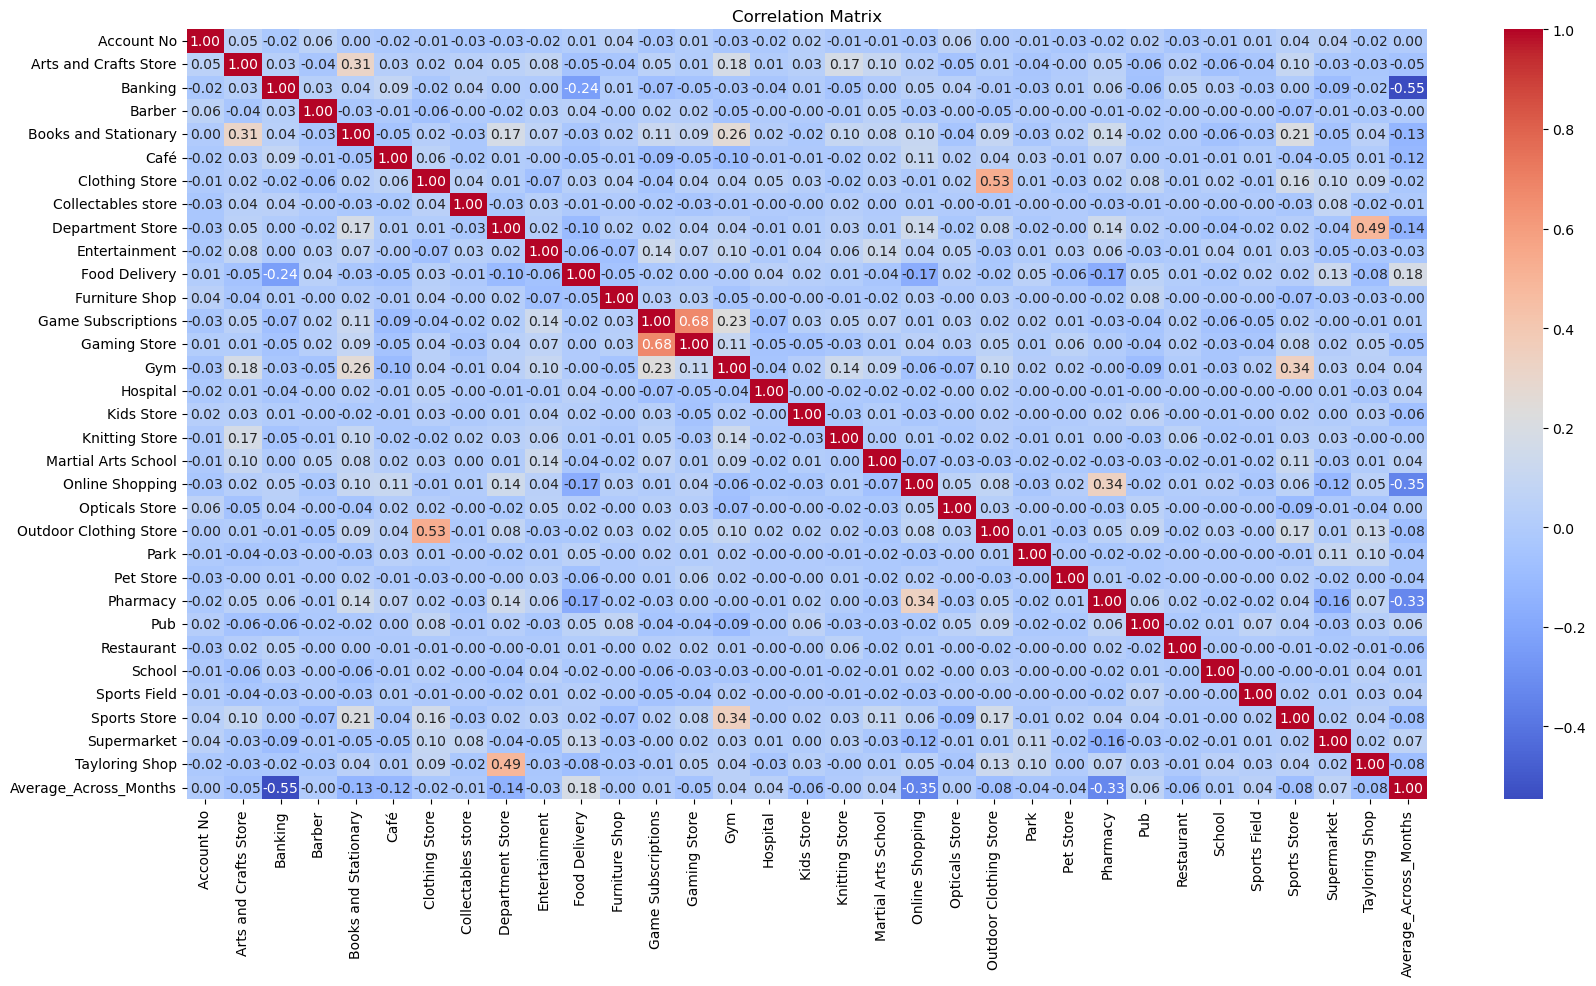

In [95]:
correlation_matrix = merged_dataset.corr()


#Visualize the correlation matrix as a heatmap using seaborn
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
#plt.savefig("figure.png")

In [96]:
X = merged_dataset.copy()

### K Means

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

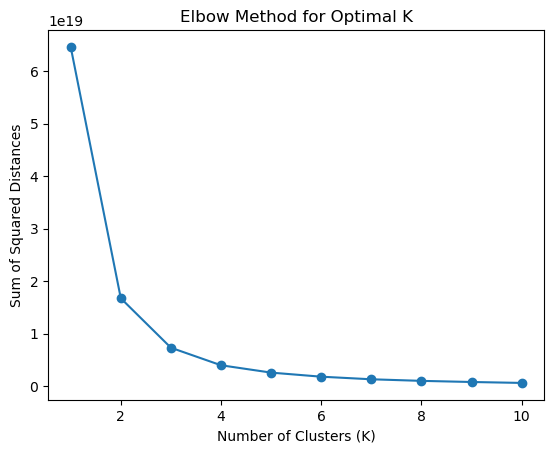

In [97]:
# Loop over values of k from 1 to 10
from sklearn.cluster import KMeans
k_values = range(1, 11)
inertia_values = []

# Fit k-means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

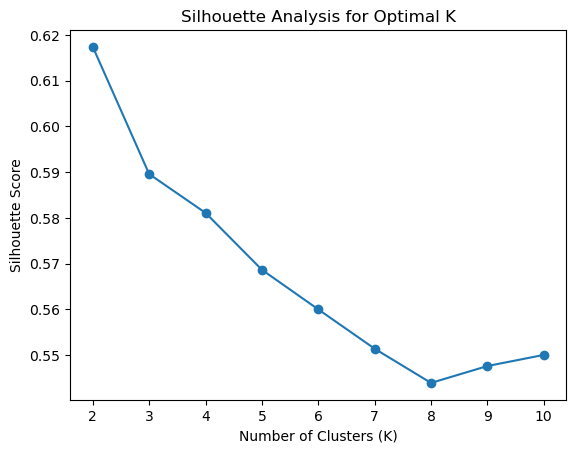

In [98]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
silhouette_scores = []

# Fit k-means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


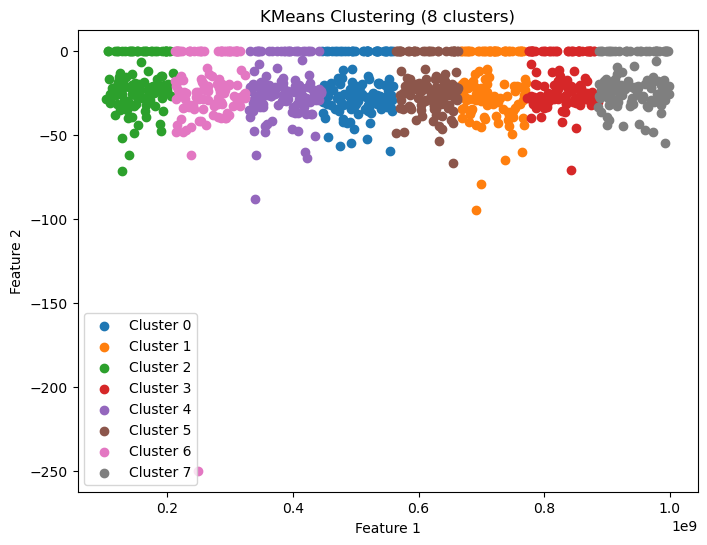

In [99]:
# Apply KMeans clustering with 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_

# Plot clusters in 2D
plt.figure(figsize=(8, 6))

# Plot data points colored by cluster label
for label in np.unique(labels):
    clustered_points = X[labels == label]
    clustered_points = np.array(clustered_points)
    plt.scatter(clustered_points[:, 0], clustered_points[:, 1], label=f'Cluster {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering (8 clusters)')

plt.legend()
plt.show()

In [100]:
#Pre-Processing data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_preprocessed = pd.DataFrame(data=X,columns=merged_dataset.columns)
X = X_preprocessed.copy()
X.head(10)

Account No  Arts and Crafts Store   Banking     Barber  \
0   -1.746131              -0.462350 -0.966369   0.032026   
1   -1.733302               1.208650 -0.970784 -31.224990   
2   -1.731188               1.208650  0.930214   0.032026   
3   -1.726425               0.240455  0.930214   0.032026   
4   -1.719119              -0.307358  0.930214   0.032026   
5   -1.718801              -0.386715  0.930214   0.032026   
6   -1.717834              -0.468336  0.930214   0.032026   
7   -1.717371              -0.625945 -1.136377   0.032026   
8   -1.708795              -0.093202 -0.526997   0.032026   
9   -1.698651              -0.085850  0.930214   0.032026   

   Books and Stationary      Café  Clothing Store  Collectables store  \
0              0.884575  0.361735       -0.748318            0.059226   
1              0.884575  0.361735        1.955189            0.059226   
2             -2.295851  0.361735       -0.269691            0.059226   
3             -0.490458  0.361735       -0.398182            0.059226   
4             -0.343059  0.361735        0.851563            0.059226   
5             -0.491697  0.361735        0.466032            0.059226   
6              0.884575  0.361735        1.955189            0.059226   
7              0.884575  0.361735       -1.000124            0.059226   
8              0.884575  0.361735       -1.946313            0.059226   
9             -0.478106  0.361735        1.318723            0.059226   

   Department Store  Entertainment  ...  Pet Store  Pharmacy       Pub  \
0          0.526262        0.57915  ...   0.032026  0.691848  0.522974   
1          0.526262       -1.02639  ...   0.032026  0.240339  0.522974   
2         -3.121501       -0.22362  ...   0.032026 -3.571856 -2.339591   
3          0.067680       -1.02639  ...   0.032026 -0.538684 -0.802904   
4         -0.115753        0.57915  ...   0.032026 -0.878171  0.522974   
5         -0.221220       -0.22362  ...   0.032026 -0.684334  0.522974   
6          0.526262       -1.02639  ...   0.032026  0.691848  0.522974   
7         -0.108120       -0.22362  ...   0.032026 -0.019850 -0.686404   
8          0.526262       -1.02639  ...   0.032026  0.691848  0.522974   
9         -0.986771        0.57915  ...   0.032026 -0.787405  0.522974   

   Restaurant    School  Sports Field  Sports Store  Supermarket  \
0    0.038335  0.082765      0.032026     -1.949436    -0.681940   
1    0.038335  0.082765      0.032026      2.080008     0.315279   
2    0.038335  0.082765      0.032026     -0.645109     0.787746   
3    0.038335  0.082765      0.032026     -1.271711     1.036492   
4    0.038335  0.082765      0.032026     -0.173827     1.097651   
5    0.038335  0.082765      0.032026     -0.296952     0.481624   
6    0.038335  0.082765      0.032026     -0.410973    -0.486378   
7    0.038335  0.082765      0.032026     -0.236802    -0.207499   
8    0.038335  0.082765      0.032026     -2.587647    -0.411716   
9    0.038335  0.082765      0.032026     -0.742963    -0.004174   

   Tayloring Shop  Average_Across_Months  
0        0.807008              -0.108585  
1        0.807008               0.000946  
2       -2.382153              -0.639708  
3        0.354673               0.000946  
4        0.385771              -0.476282  
5        0.256379               1.715419  
6        0.807008              -0.697573  
7        0.284898               2.566869  
8        0.807008               0.000946  
9       -0.163678               0.662267  

[10 rows x 33 columns]

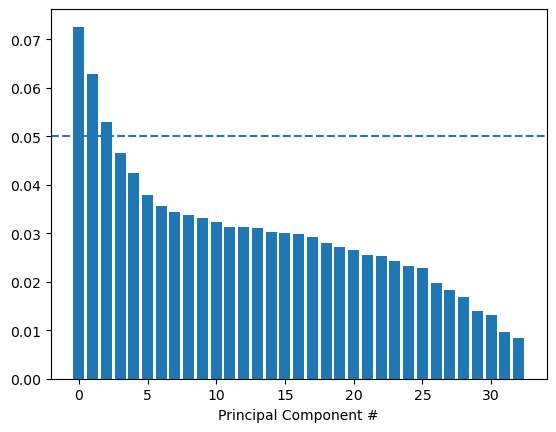

In [101]:
from sklearn.decomposition import PCA

pca= PCA()
pca.fit(X)
exp_variance = pca.explained_variance_ratio_

#plotting explained variance

fig,ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.axhline(y=0.05, linestyle='--');

In [102]:
#Graph shows only features 0 and 1 are above 10%
#Running PCA with only these features

n_components = 3

pca = PCA(n_components=n_components, random_state=42)

X = pca.fit_transform(X)

In [103]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_blobs


param_grid = {'eps': [0.1, 0.5, 1.0, 1.5], 'min_samples': [3, 5, 10, 15]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'eps': 1.5, 'min_samples': 3}
Best Silhouette Score: 0.4902881612474454


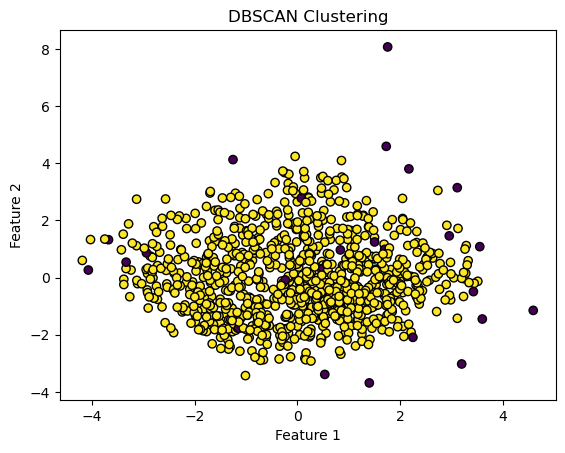

In [104]:
# Apply DBSCAN
dbscan = DBSCAN(eps= 1.0, min_samples= 5)
labels = dbscan.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [105]:
from sklearn.cluster import HDBSCAN


param_grid = {'min_cluster_size': [50, 100, 200, 500], 'min_samples': [1, 3, 5, 10]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    hdbscan = HDBSCAN(**params)
    labels = hdbscan.fit_predict(X)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'min_cluster_size': 50, 'min_samples': 3}
Best Silhouette Score: -0.12040567734311709


In [106]:
from sklearn.cluster import OPTICS


param_grid = {'eps': [0.1, 0.5, 1.0, 1.5], 'min_samples': [3, 5, 10, 15]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    optics = OPTICS(**params)
    labels = optics.fit_predict(X)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'eps': 0.1, 'min_samples': 15}
Best Silhouette Score: -0.05485087991737772


In [107]:
import umap
from sklearn.cluster import HDBSCAN#
import plotly.express as px


# Apply UMAP for dimensionality reduction with 2 components
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(X)  # Change to your preprocessed data

# Apply HDBSCAN for clustering
clusterer = HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(embedding)

# Create a DataFrame from the embedding
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Add cluster labels to the embedding DataFrame
embedding_df['cluster'] = cluster_labels

# Plot clusters in 2D using plotly
fig = px.scatter_3d(embedding_df, x='UMAP1', y='UMAP2',  z='UMAP3', color='cluster', opacity=0.7)
fig.show()